In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.impute import SimpleImputer

hist_df = pd.DataFrame(columns=['Date'])
# num_days = (datetime.today() - datetime(1970,1,1)).days
# hist_df['Date'] = [datetime.today() - timedelta(days=x) for x in range(num_days)] 
# hist_df['Num_Days'] = range(num_days) 

symbols = ['AAPL','AMZN','DIA','FB','MSFT','NFLX','SPY','TSLA','TWTR','XOM']
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

for s in symbols:
    sym_df = pd.read_csv(s+'.csv')
    imp_mean.fit(sym_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
    imp_df = pd.DataFrame(imp_mean.transform(sym_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]))
    imp_df.rename(columns={0:'Open',
                           1:'High',
                           2:'Low',
                           3:'Close',
                           4:'Adj Close',
                           5:'Volume'}, inplace=True)
    imp_df['Date'] = pd.to_datetime(sym_df.Date)
    imp_df['Symbol'] = s
    imp_df['Num_Days'] = (imp_df['Date'] - imp_df['Date'].min()).dt.days
    hist_df = hist_df.append(imp_df,sort=False)

hist_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Num_Days
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.404953,117258400.0,AAPL,0.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.383825,43971200.0,AAPL,3.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.355655,26432000.0,AAPL,4.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.364458,21610400.0,AAPL,5.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375022,18362400.0,AAPL,6.0
...,...,...,...,...,...,...,...,...,...
12607,2020-08-06,43.400002,43.900002,43.250000,43.639999,42.795731,14434900.0,XOM,18256.0
12608,2020-08-07,43.230000,43.520000,42.810001,43.439999,42.599598,18749700.0,XOM,18257.0
12609,2020-08-10,43.990002,44.599998,43.599998,44.509998,43.648899,24367800.0,XOM,18260.0
12610,2020-08-11,45.500000,46.419998,44.730000,44.970001,44.100002,28987500.0,XOM,18261.0


In [2]:
for s in symbols:
    sym_df = pd.read_csv(s+'.csv')
    sym_df['Date'] = pd.to_datetime(sym_df.Date)
    print('\n'+s)
    sym_df.info()


AAPL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 7 columns):
Date         10009 non-null datetime64[ns]
Open         10008 non-null float64
High         10008 non-null float64
Low          10008 non-null float64
Close        10008 non-null float64
Adj Close    10008 non-null float64
Volume       10008 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 547.5 KB

AMZN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 7 columns):
Date         5858 non-null datetime64[ns]
Open         5858 non-null float64
High         5858 non-null float64
Low          5858 non-null float64
Close        5858 non-null float64
Adj Close    5858 non-null float64
Volume       5858 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 320.5 KB

DIA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687 entries, 0 to 5686
Data columns (total 7 columns):
Date         5687 non-

In [3]:
for s in symbols:
    sym_df = pd.read_csv(s+'.csv')
    sym_df['Date'] = pd.to_datetime(sym_df.Date)
    print('\n'+s)
    print(sym_df.describe())


AAPL
               Open          High           Low         Close     Adj Close  \
count  10008.000000  10008.000000  10008.000000  10008.000000  10008.000000   
mean      35.721562     36.096375     35.358408     35.745151     33.580642   
std       66.215174     66.950258     65.585589     66.327710     64.678233   
min        0.198661      0.198661      0.196429      0.196429      0.154939   
25%        1.080357      1.100446      1.055782      1.080357      0.919535   
50%        1.750000      1.782857      1.719643      1.750000      1.474289   
75%       38.976072     39.449285     38.568571     39.129286     33.813148   
max      477.049988    499.470001    477.000000    497.480011    497.480011   

             Volume  
count  1.000800e+04  
mean   8.535327e+07  
std    8.568764e+07  
min    3.472000e+05  
25%    3.287522e+07  
50%    5.716655e+07  
75%    1.063380e+08  
max    1.855410e+09  

AMZN
              Open         High          Low        Close    Adj Close  \
coun

C:\Users\Joe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


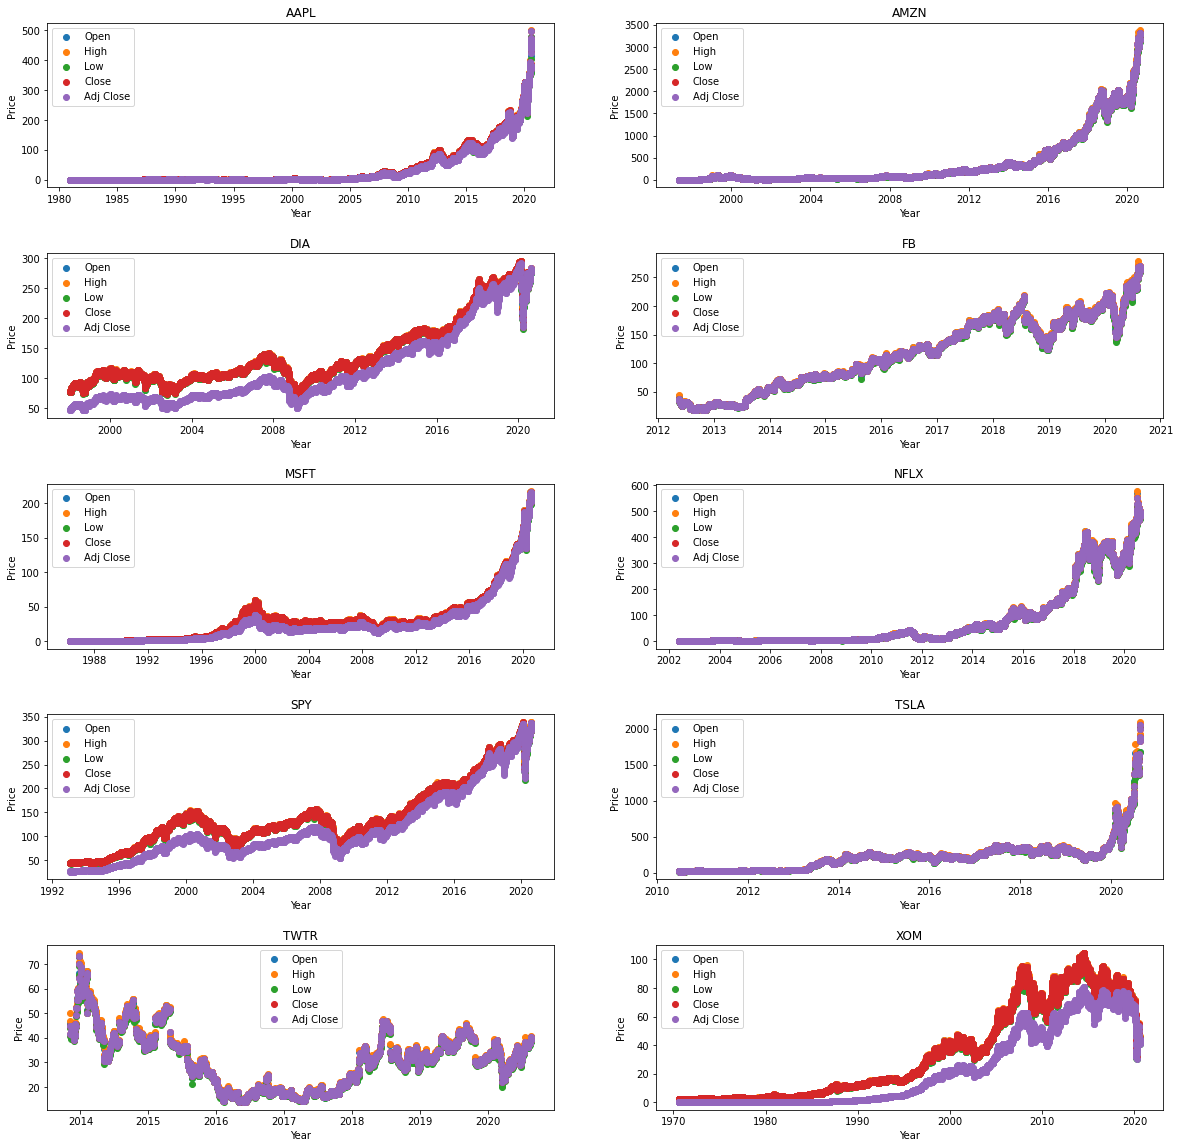

In [4]:
fig,i = plt.subplots(5,2,figsize=(20,20))
n = 0
for a in range(5):
    for b in range(2):
        s = symbols[n]
        portfolio_df = pd.read_csv(s+'.csv')
        portfolio_df['Date'] = pd.to_datetime(portfolio_df.Date)
        for col in portfolio_df.columns[1:6]:
            i[a][b].scatter(portfolio_df['Date'],portfolio_df[col],label=col)
        i[a][b].legend(loc='best')
        i[a][b].set_xlabel('Year')
        i[a][b].set_ylabel('Price')
        i[a][b].set_title(s)
        n += 1
        
fig.subplots_adjust(hspace=0.4)
plt.show()

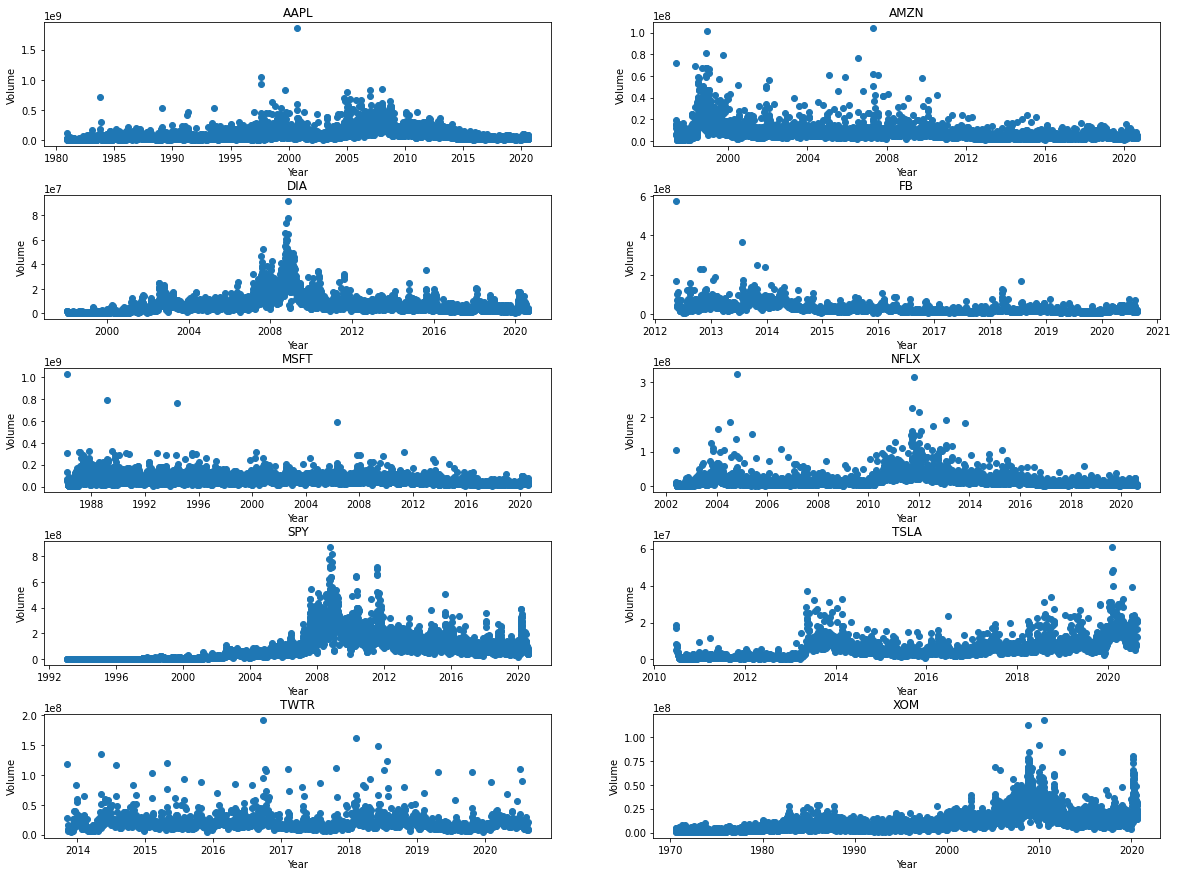

In [5]:
fig,i = plt.subplots(5,2,figsize=(20,15))
n = 0
for a in range(5):
    for b in range(2):
        s = symbols[n]
        portfolio_df = pd.read_csv(s+'.csv')
        portfolio_df['Date'] = pd.to_datetime(portfolio_df.Date)
        i[a][b].scatter(portfolio_df['Date'],portfolio_df.Volume)
        i[a][b].set_xlabel('Year')
        i[a][b].set_ylabel('Volume')
        i[a][b].set_title(s)
        n += 1
fig.subplots_adjust(hspace=0.4)
plt.show()

C:\Users\Joe\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Joe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Joe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Joe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Joe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


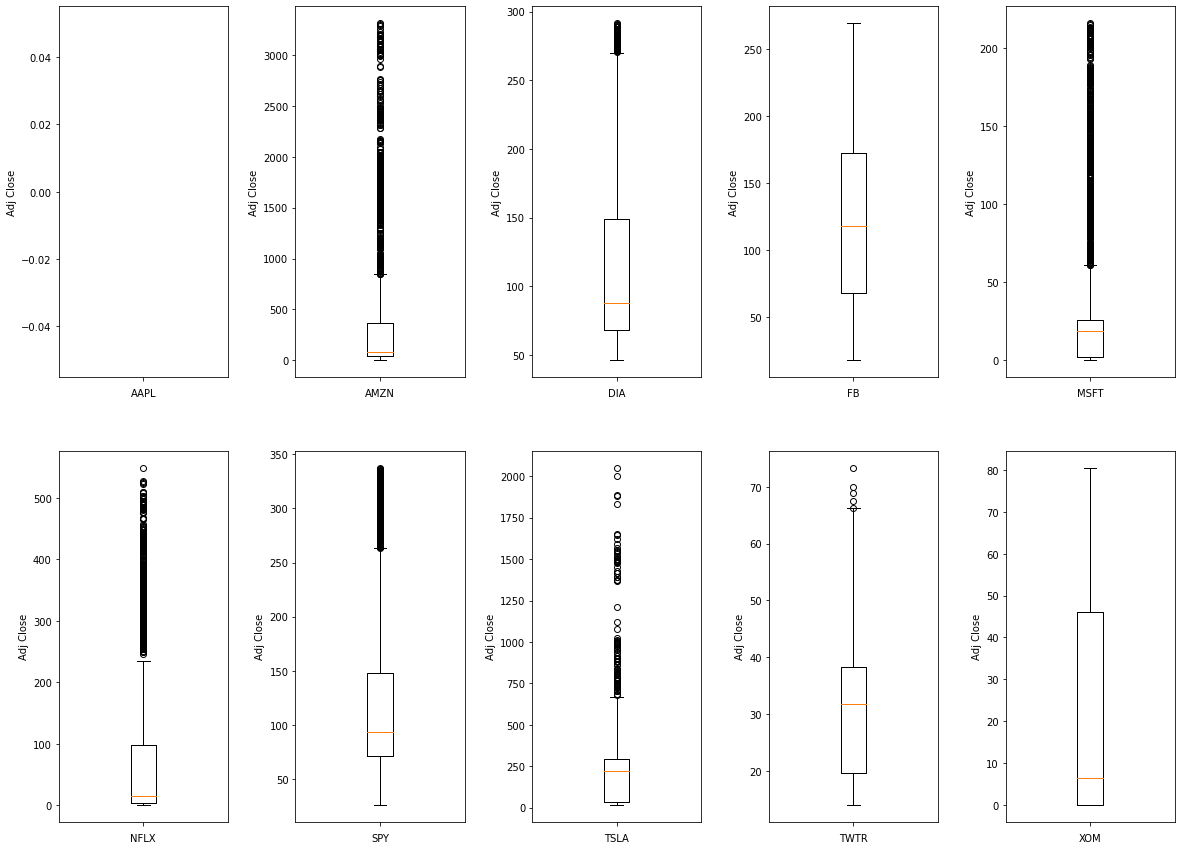

In [6]:
fig,i = plt.subplots(2,5,figsize=(20,15))
n = 0
for a in range(2):
    for b in range(5):
        s = symbols[n]
        portfolio_df = pd.read_csv(s+'.csv')
        portfolio_df['Date'] = pd.to_datetime(portfolio_df.Date)
        i[a][b].boxplot(portfolio_df['Adj Close'])
        i[a][b].set_xticklabels("")
        i[a][b].set_xlabel(s)
        i[a][b].set_ylabel('Adj Close')
        n += 1
fig.subplots_adjust(wspace=0.4)
plt.show()

C:\Users\Joe\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Joe\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


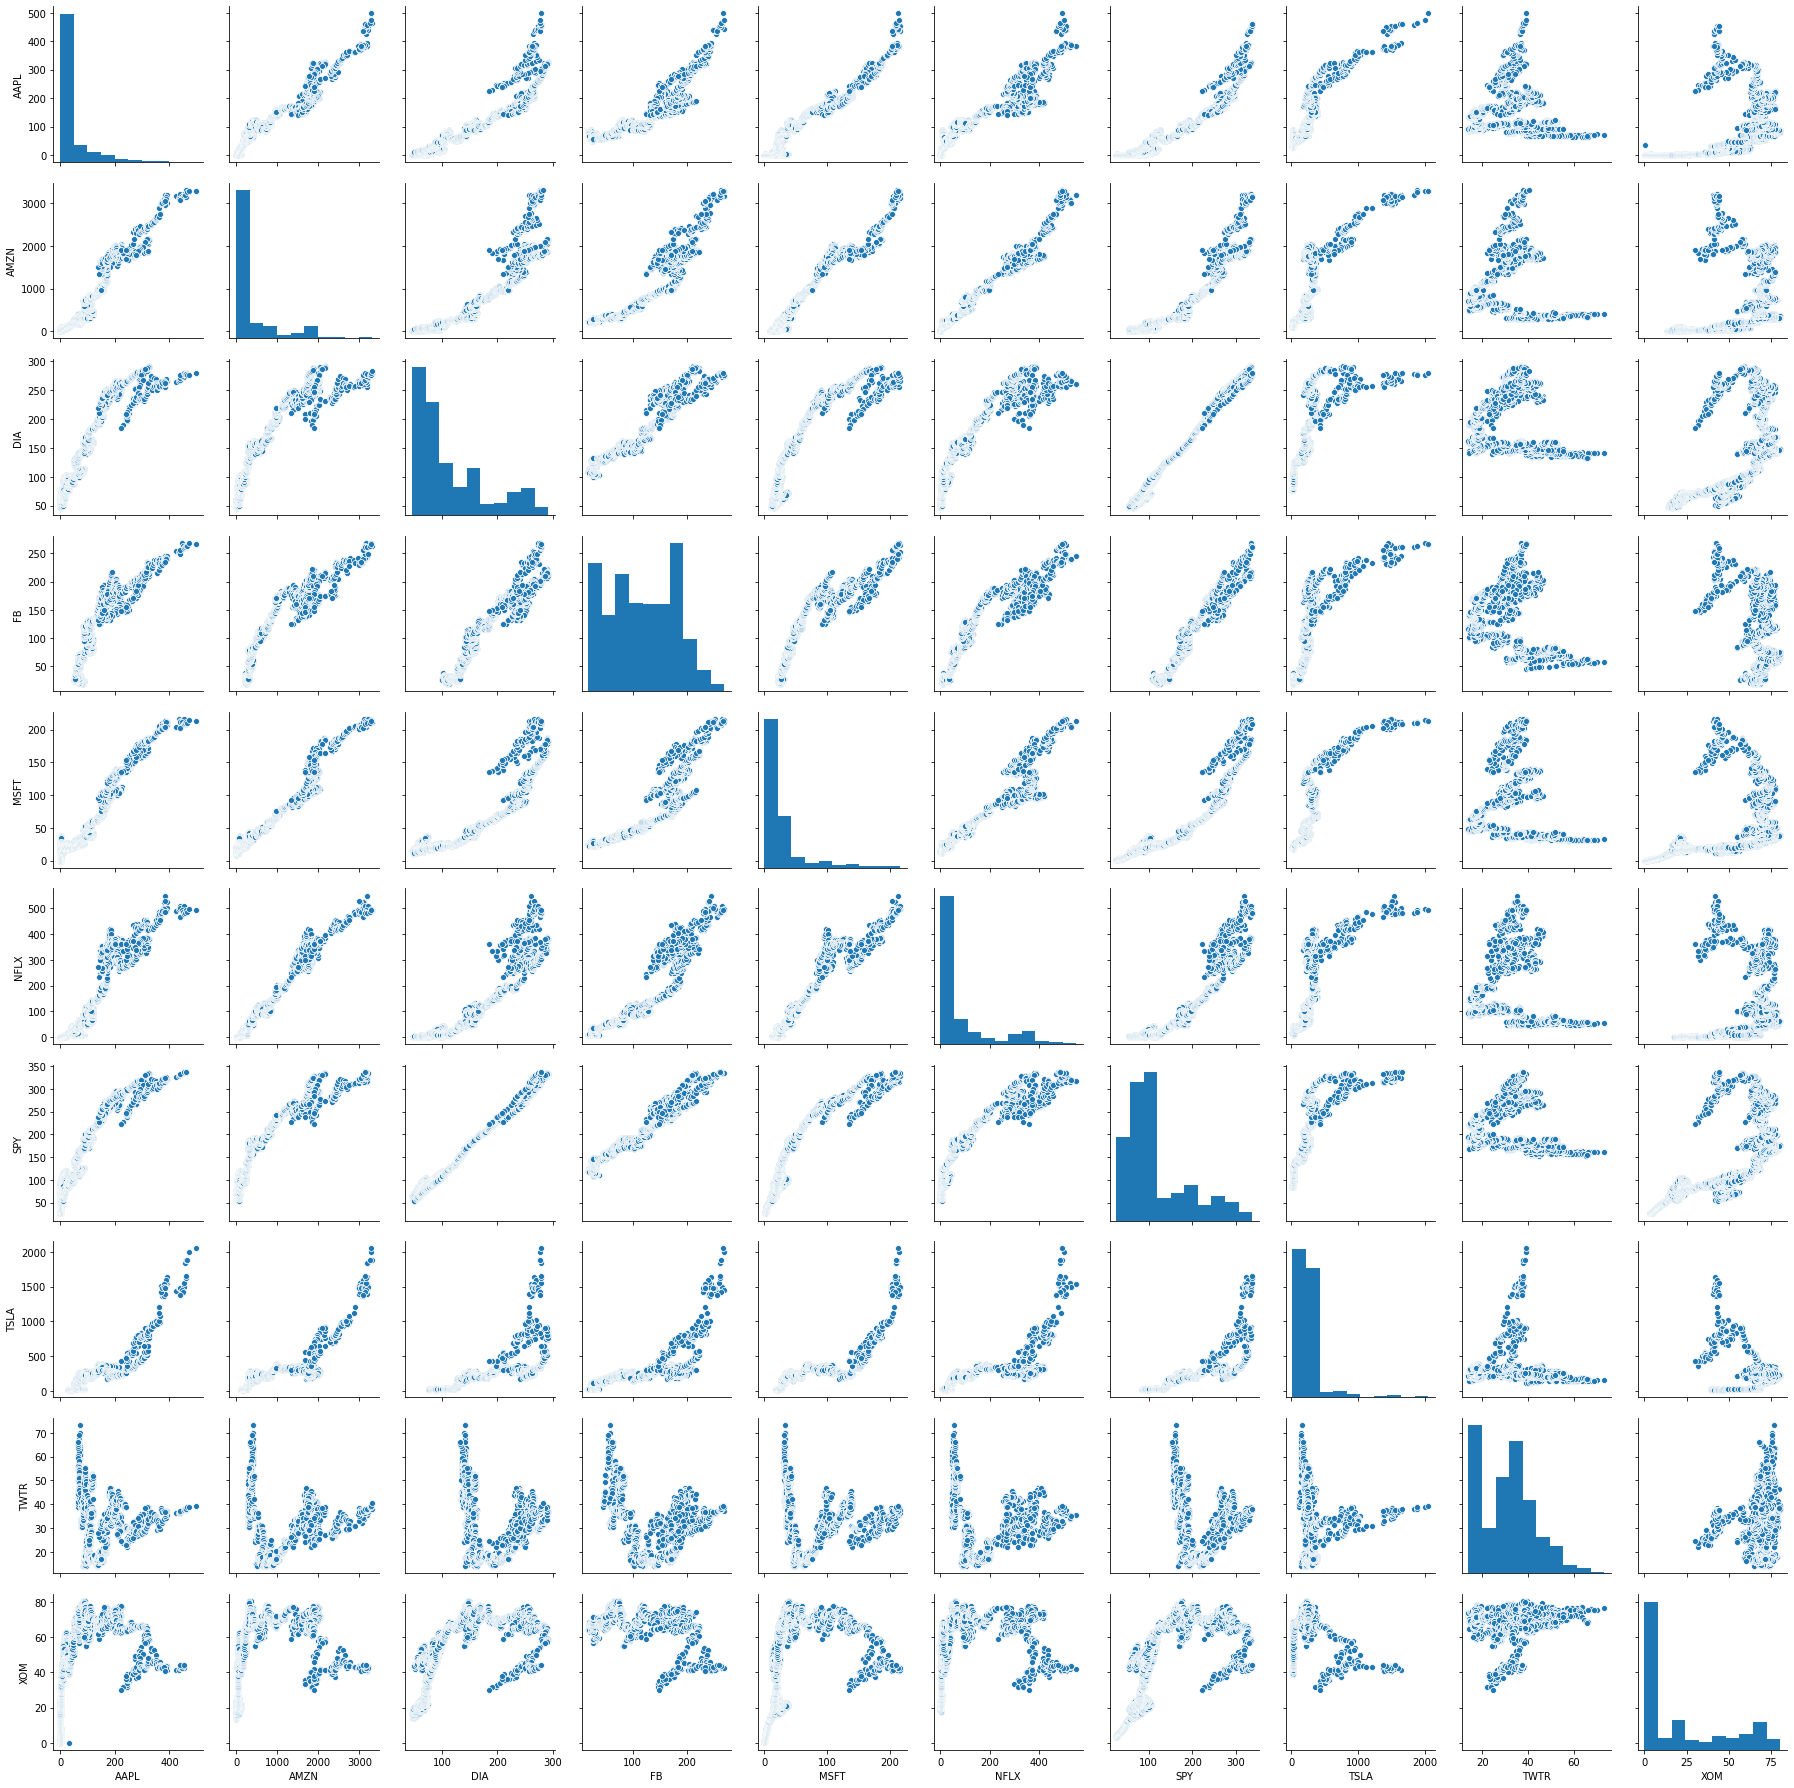

In [25]:
adjClose_df = hist_df[['Date','Adj Close','Symbol','Num_Days']]
adjClose_pivot = adjClose_df.pivot(index='Date', columns='Symbol', values='Adj Close')

sns.pairplot(adjClose_pivot)

In [24]:
adjClose_df

,Date,Adj Close,Symbol,anomaly
0,1980-12-12,0.404953,AAPL,-1.0
1,1980-12-15,0.383825,AAPL,-1.0
2,1980-12-16,0.355655,AAPL,-1.0
3,1980-12-17,0.364458,AAPL,-1.0
4,1980-12-18,0.375022,AAPL,-1.0
...,...,...,...,...
12607,2020-08-06,42.795731,XOM,NaN
12608,2020-08-07,42.599598,XOM,NaN
12609,2020-08-10,43.648899,XOM,NaN
12610,2020-08-11,44.100002,XOM,NaN


C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


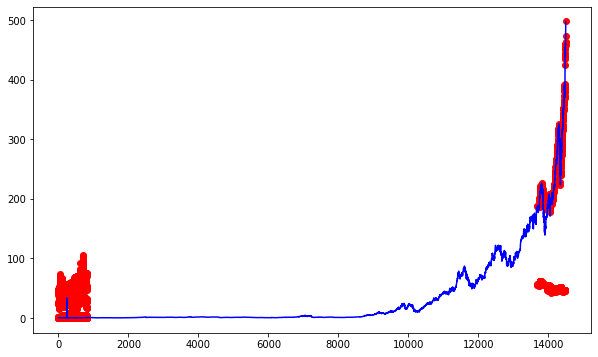

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# def detect_anomaly(ticker):
data = hist_df[hist_df.Symbol == 'AAPL'][['Num_Days','Adj Close']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train oneclassSVM
outliers_fraction = 0.1
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(data)
adjClose_df['anomaly'] = pd.Series(model.predict(data))

plt.figure(figsize=(10,6))
a = adjClose_df.loc[adjClose_df['anomaly'] == -1, ['Num_Days', 'Adj Close']] #anomaly

plt.plot(hist_df[hist_df.Symbol == 'AAPL']['Num_Days'], hist_df[hist_df.Symbol == 'AAPL']['Adj Close'], color='blue')
plt.scatter(a['Num_Days'],a['Adj Close'], color='red')
plt.show();
    
# for s in symbols:
#     detect_anomaly(s)

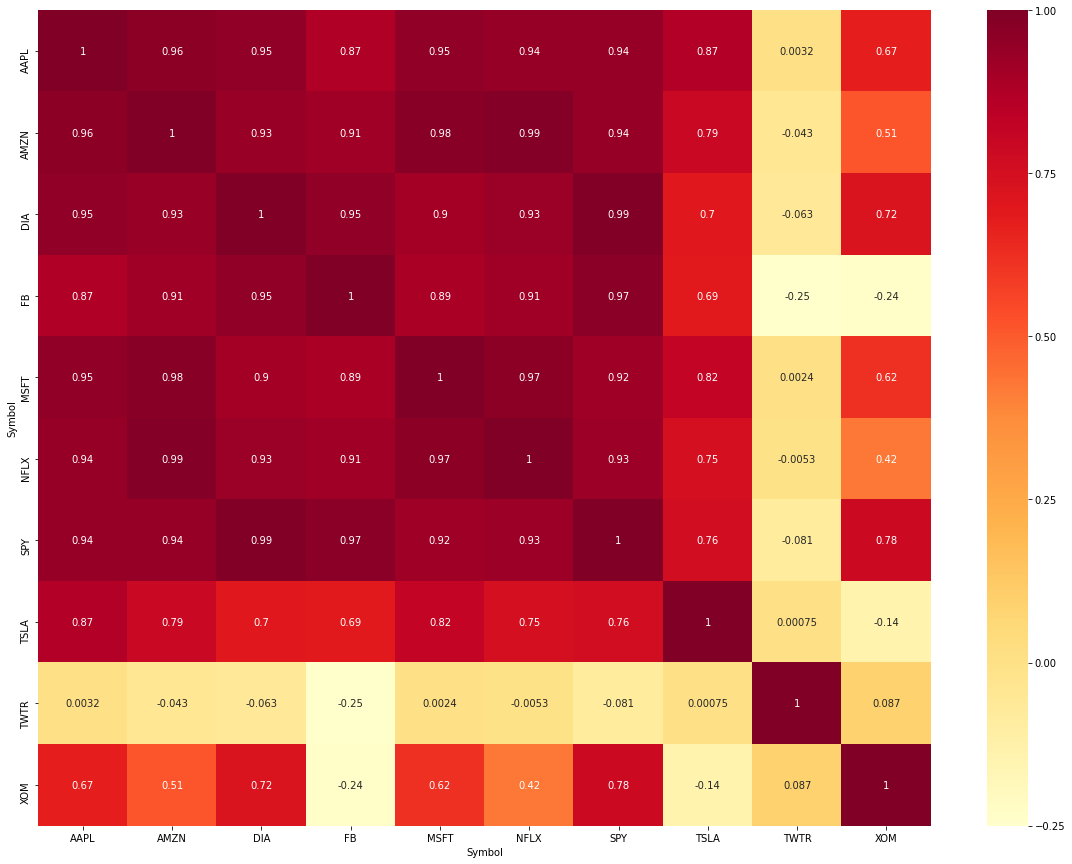

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(adjClose_pivot.corr(), annot=True, cmap = 'YlOrRd')
plt.show()

C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


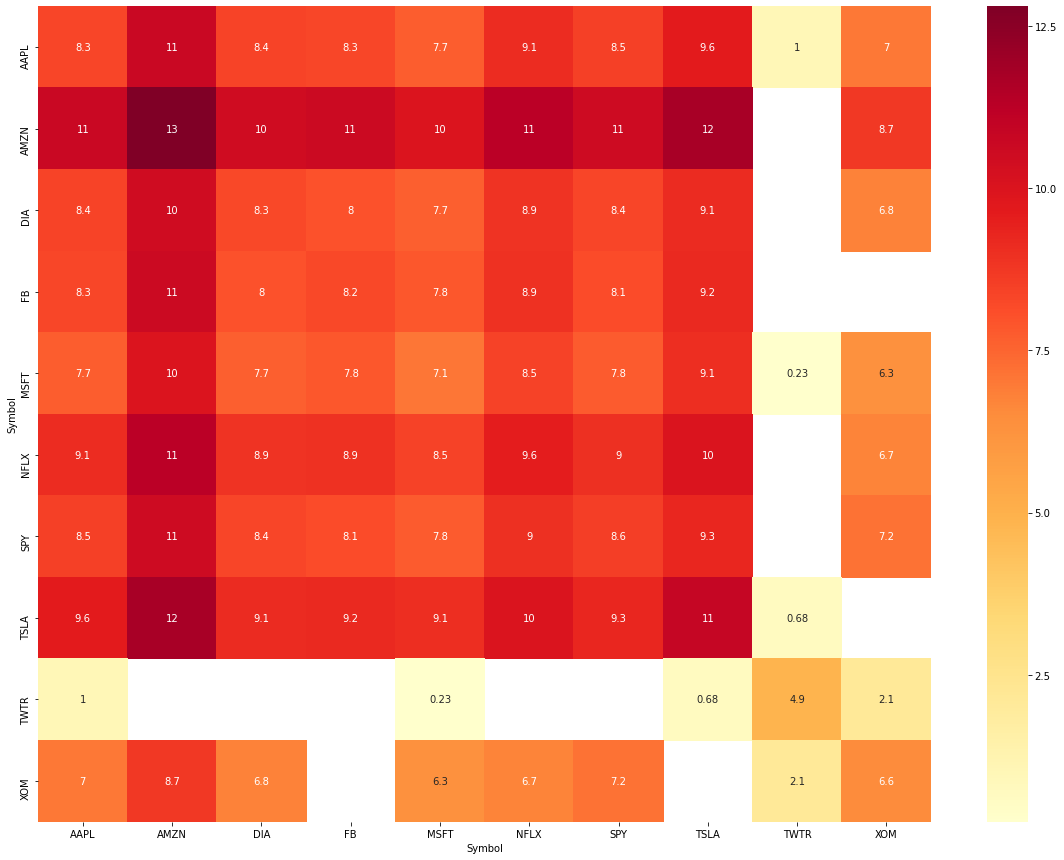

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(np.log(adjClose_pivot.cov()), annot=True, cmap = 'YlOrRd')
plt.show()